# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [46]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [47]:
### Replace each question mark with the appropriate value.

N, W, H, C = X_train.shape
# TODO: Number of training examples
n_train = N

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (W, H)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43  # number of rows in the file signnames.csv

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(X_train.dtype)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
uint8


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

<Container object of 43 artists>

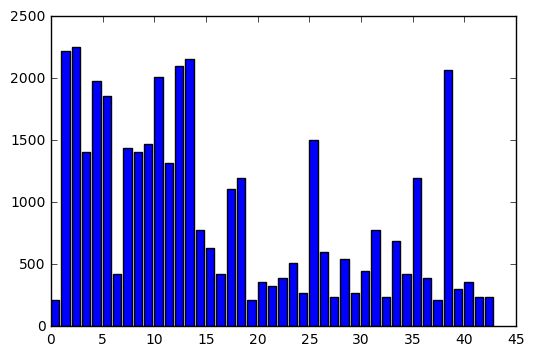

In [48]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Plotting number of samples v/s sign id
counts = []
for i in range(43):
    counts.append(np.sum(y_train == i))

plt.bar(range(43),counts)

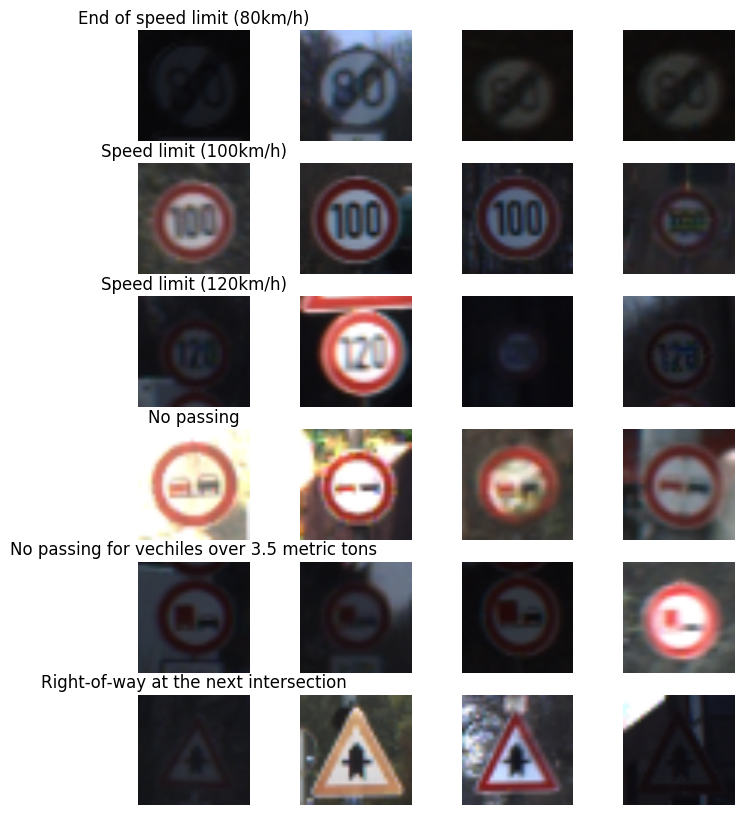

In [49]:
plt.rcParams['figure.figsize'] = (8, 10)

labels = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 
          'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 
          'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 
          'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 
          'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 
          'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 
          'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 
          'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 
          'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 
          'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric tons']

num_classes = len(labels)

# Visualize 3 Samples per class for 6 classes at a time
samples_per_class = 4
classes_per_visualization = 6

# Change this parameter to decide which classes to visualize. Should be <= 7
class_id_offset = 1

ids = range(num_classes)

start = class_id_offset*classes_per_visualization
end = min(start + classes_per_visualization, num_classes)

label_slice = labels[start:end]
ids_slice = ids[start:end]

for j, class_id in enumerate(ids_slice):
    title = label_slice[j]

    idxs = np.flatnonzero(y_train == class_id)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = j*samples_per_class + i + 1
        plt.subplot(classes_per_visualization, samples_per_class, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(title)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(136016, 32, 32, 3) (136016,)


(0, 5000)

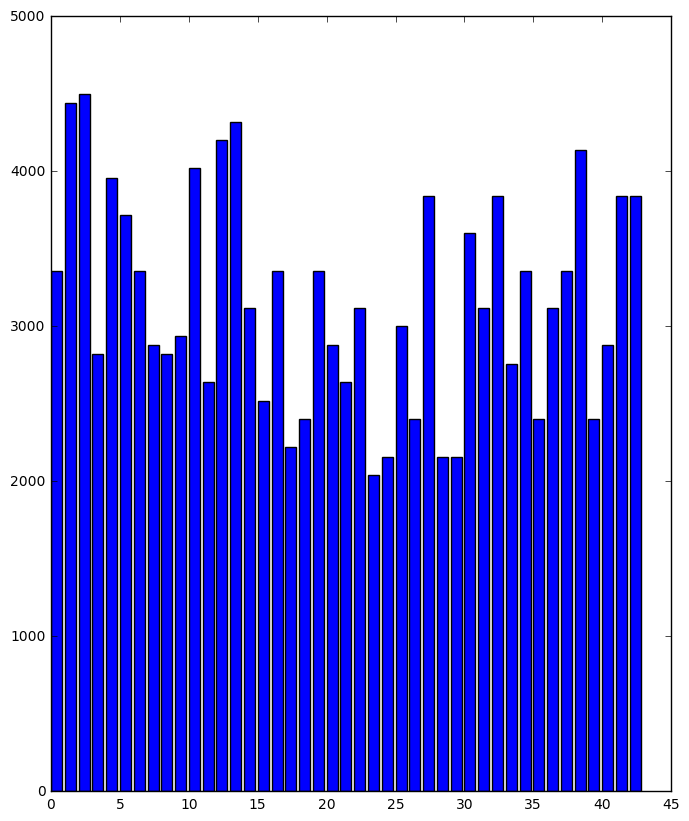

In [50]:
# Lets generate additional data
from scipy.ndimage import rotate
from sklearn.utils import shuffle

def generate_additional_data_rotate(x, y):
    for i in range(43):
        indexes = y == i
        count = np.sum(indexes)
        x_train_sample = x[indexes]
        y_train_sample = y[indexes]
        if count < 500:
            # three random angles between -10 to 10 degress
            three_random_angles = 20.0*np.random.random_sample(3) - 10.0
            x1 = rotate(x_train_sample, three_random_angles[0], axes=(1,2), reshape=False)
            x2 = rotate(x_train_sample, three_random_angles[1], axes=(1,2), reshape=False)
            x3 = rotate(x_train_sample, three_random_angles[2], axes=(1,2), reshape=False)
            X_additional = np.concatenate((x1, x2, x3))
            x = np.concatenate((x, X_additional))
            y = np.concatenate((y, y_train_sample, y_train_sample, y_train_sample))
        elif count < 1000:
            # one random angles between -10 to 10 degress
            one_random_angle = 20.0*np.random.random_sample(1) - 10.0
            x1 = rotate(x_train_sample, one_random_angle[0], axes=(1,2), reshape=False)
            x = np.concatenate((x, x1))
            y = np.concatenate((y, y_train_sample))
            
    return x, y

X_train, y_train = generate_additional_data_rotate(X_train, y_train)
X_train, y_train = generate_additional_data_rotate(X_train, y_train)

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

def generate_additional_data_translate(x, y):
    num_total = y.shape[0]
    first_break = int(num_total/3)
    second_break = 2*first_break
    x_sample_1 = x[0:first_break]
    x_sample_2 = x[first_break:second_break]
    x_sample_3 = x[second_break:]
    y1 = y[0:first_break]
    y2 = y[first_break:second_break]
    y3 = y[second_break:]
    
    random_integer = 0
    while(random_integer == 0):
        random_integer = np.random.randint(-4,4)
    x1 = np.roll(x_sample_1, random_integer, axis=2)
    
    random_integer = 0
    while(random_integer == 0):
        random_integer = np.random.randint(-4,4)
    x2 = np.roll(x_sample_2, random_integer, axis=2)
        
    random_integer = 0
    while(random_integer == 0):
        random_integer = np.random.randint(-4,4)
    x3 = np.roll(x_sample_3, random_integer, axis=2)
    
    x = np.concatenate((x, x1, x2, x3))
    y = np.concatenate((y, y1, y2, y3))
    return x, y

X_train, y_train = generate_additional_data_translate(X_train, y_train)
print(X_train.shape, y_train.shape)

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# Plotting number of samples v/s sign id
counts = []
for i in range(43):
    counts.append(np.sum(y_train == i))

count_plot = plt.bar(range(43),counts)
axes = plt.gca()
axes.set_ylim([0,5000])

In [51]:
# Preprocess the data here.
# Feel free to use as many code cells as needed.

# Change to float32, so it can be multiplied against the weights in TensorFlow, which are float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-0.5, 0.5]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    image_data = rgb2gray(image_data)
    normalized = (image_data)/255.0 - 0.5
    normalized = normalized.reshape((-1,32,32,1))
    return normalized.astype(np.float32)

X_train = normalize(X_train)
X_test = normalize(X_test)

print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(136016, 32, 32, 1) float32
(12630, 32, 32, 1) float32


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Neural networks train faster when the data is normalized. The usual strategy is to center the data in a small interval around zero. I have implemented the min-max scaling of the image so that all the pixel values lie between -0.5 and 0.5. Since every pixel is an 8 bit unsigned integer, the minimum value is 0 and maximum value is 255.

In [52]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.



In [53]:
# Lets split the training dataset into 80% training & 20% validation
# Get randomized datasets for training and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=832289)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(122414, 32, 32, 1) (122414,)
(13602, 32, 32, 1) (13602,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I have generate additional data using rotation and translation of the original images.

## Step 1: Rotation

The training set has different number of images for each label. In order to ensure that the labels which have larger number of images donot bias the network, I have generated additional images for others.

1. **For labels with #images < 500**: I have generated 3 additional images by rotating the images by 3 randomly chosen angles between -10 and 10 degrees.
2. **For labels with #images < 1000**: I have generated 1 additional image by rotating the images by 1 randomly chosen angle between -10 and 10 degrees.
3. Then I shuffle the dataset

## Step 2: Translation

Then I generate 1 additional image for each image by translating it by randomly chosen integer between -4 and 4 pixels (0 not included). Since operating on images one at a time is time consuming, I split the set into 3 batches and then translate each batch by a randomly chosen integer between -4 and 4 pixels (0 not included). After this I shuffle the dataset.

## Train-Val Split

I have used the `train_test_split` method available in the `sklearn.model_selection` module to split the data into train and val sets. The split is in the ratio 9:1

In [54]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Data set consists of 32x32x3 images
x = tf.placeholder(tf.float32, (None, 32,32,1))

# Classify over 43 traffic signs 0-42
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Probability for dropout
keep_prob = tf.placeholder(tf.float32, [])

# Regularization strength
reg = 0.0

# Hyperparameters
mu = 0
sigma = 0.1


# Model architecture:
# INPUT -> (CONV -> ACT -> DROPOUT -> POOL) -> (CONV -> ACT -> DROPOUT -> POOL) -> FLATTEN -> FC -> ACT -> FC -> ACT -> SOFTMAX

# layer 1. Output to be 30x30x6
filter_size = 3
convolution_strides = [1,1,1,1]
convolution_padding = 'VALID'
weights_1 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size,1,16), mean = mu, stddev = sigma))
biases_1 = tf.Variable(tf.zeros(16))
layer_1 = tf.nn.conv2d(x, weights_1, padding=convolution_padding, strides=convolution_strides)
layer_1 = tf.nn.bias_add(layer_1, biases_1)
layer_1 = tf.nn.relu(layer_1)
layer_1 = tf.nn.dropout(layer_1, keep_prob)

# layer 1 pooling. Output 15x15x16
pooling_strides = [1,2,2,1]
pooling_padding = 'VALID'
layer_1 = tf.nn.max_pool(layer_1, ksize=[1,2,2,1], strides=pooling_strides, padding=pooling_padding)

# layer 2. Output to be 13x13x32
filter_size = 3
convolution_strides = [1, 1, 1, 1]
convolution_padding = 'VALID'
weights_2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, 16, 32), mean = mu, stddev = sigma))
biases_2 = tf.Variable(tf.zeros(32))
layer_2 = tf.nn.conv2d(layer_1, weights_2, padding=convolution_padding, strides=convolution_strides)
layer_2 = tf.nn.bias_add(layer_2, biases_2)
layer_2 = tf.nn.relu(layer_2)
layer_2 = tf.nn.dropout(layer_2, keep_prob)

# # layer 2 pooling. Output 6x6x32
pooling_strides = [1, 2, 2, 1]
pooling_padding = 'VALID'
layer_2 = tf.nn.max_pool(layer_2, ksize=[1, 3, 3, 1], strides=pooling_strides, padding=pooling_padding)

layer_2_flat = flatten(layer_2)

# fc1 has 512 outputs
weights_fc_1 = tf.Variable(tf.truncated_normal(shape=(6*6*32,512), mean = mu, stddev = sigma))
biases_fc_1 = tf.Variable(tf.zeros(512))
fc1_out = tf.nn.bias_add(tf.matmul(layer_2_flat, weights_fc_1), biases_fc_1)
fc1_out = tf.nn.relu(fc1_out)

# fc2 has 512 outputs
weights_fc_2 = tf.Variable(tf.truncated_normal(shape=(512,512), mean = mu, stddev = sigma))
biases_fc_2 = tf.Variable(tf.zeros(512))
fc2_out = tf.nn.bias_add(tf.matmul(fc1_out, weights_fc_2), biases_fc_2)
fc2_out = tf.nn.relu(fc2_out)

# fc2, has 43 outputs
weights_fc_3 = tf.Variable(tf.truncated_normal(shape=(512, 43),mean = mu, stddev = sigma))
biases_fc_3 = tf.Variable(tf.zeros(43))
logits = tf.nn.bias_add(tf.matmul(fc2_out, weights_fc_3), biases_fc_3)

In [55]:
learning_rate = tf.placeholder(tf.float32, [])
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)) + reg*tf.nn.l2_loss(weights_fc_1) + reg*tf.nn.l2_loss(weights_fc_2) + reg*tf.nn.l2_loss(weights_fc_3)
opt = tf.train.AdagradOptimizer(learning_rate=learning_rate)
train_op = opt.minimize(loss_op)
is_correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

In [56]:
def evaluate(X_data, y_data, sess):
    num_examples = X_data.shape[0]
    total_accuracy = 0
    total_acc, total_loss = 0, 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples

In [57]:
def deleteOldModelFiles():
    try:
        import os
        os.remove('myModel')
        os.remove('myModel.meta')
        os.remove('checkpoint')
    except:
        print("Unable to delete file.")

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

def train(X_tr, y_tr, X_v, y_v, X_t, y_t, lr):
    num_train = X_tr.shape[0]
    sess.run(tf.global_variables_initializer())
    steps_per_epoch = num_train // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    training_loss_history = []
    validation_loss_history = []
    training_accuracy_history = []
    validation_accuracy_history = []

    # Train model
    for i in range(EPOCHS):
        X_tr, y_tr = shuffle(X_tr, y_tr)
        for step in range(steps_per_epoch):
            start = step*BATCH_SIZE
            end = start + BATCH_SIZE
            batch_x, batch_y = X_tr[start:end], y_tr[start:end]
            _ = sess.run(train_op, feed_dict={
                    x: batch_x,
                    y: batch_y,
                    learning_rate:lr,
                    keep_prob: 0.5
            })

        # Log accuracy and loss every epoch
        training_loss, training_accuracy = evaluate(X_tr,y_tr, sess)
        training_loss_history.append(training_loss)
        training_accuracy_history.append(training_accuracy)

        val_loss, val_acc = evaluate(X_v, y_v, sess)
        validation_loss_history.append(val_loss)
        validation_accuracy_history.append(val_acc)

        print("EPOCH {} ...".format(i+1))
        print("Training loss = {:.3f}".format(training_loss))
        print("Training accuracy = {:.3f}".format(training_accuracy))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation accuracy = {:.3f}".format(val_acc))
        print()

    # Evaluate on the test data
    test_loss, test_acc = evaluate(X_t, y_t, sess)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))

    loss_plot = plt.subplot(2,1,1)
    loss_plot.set_title('Loss')
    loss_plot.plot(training_loss_history, 'r', label='Training Loss')
    loss_plot.plot(validation_loss_history, 'b', label='Validation Loss')
    loss_plot.set_xlim([0, EPOCHS])
    loss_plot.legend(loc=4)
    acc_plot = plt.subplot(2,1,2)
    acc_plot.set_title('Accuracy')
    acc_plot.plot(training_accuracy_history,'r', label='Training Accuracy')
    acc_plot.plot(validation_accuracy_history, 'b', label='Validation Accuracy')
    acc_plot.set_ylim([0, 1.0])
    acc_plot.set_xlim([0, EPOCHS])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.show()
    try:
        saver
    except:
        saver = tf.train.Saver()
    deleteOldModelFiles()
    saver.save(sess, 'myModel')
    print("Model saved")

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The model has 5 layers.

1. **Layer 1**: Conv layer with 16 filters of size 3x3. Followed by relu activation and dropout layers. This is followed by a 2x2 max pooling layer. The output is 15x15x16
2. **Layer 2**: Conv layer with 32 filters of size 3x3. Followed by relu activation and dropout layers. This is followed by a 2x2 max pooling layer. The output is 6x6x32
3. **Layer 3**: Fully connected layer with 512 neurons. This is followed by relu activation layer.
4. **Layer 4**: Fully connected layer with 512 neurons. This is followed by relu activation layer.
5. **Layer 5**: Finally layer 5 is a softmax layer with 43 outputs.

In [58]:
### Train your model here.
### Feel free to use as many code cells as needed.


# First I'll use a smaller subset of the data to do a quick coarse search
# over hyperparameters batch_size and learning_rate
n_train = X_train.shape[0]

num_train_small = 50000
indexes = np.random.choice(n_train, num_train_small, replace=False)
X_train_small = X_train[indexes]
y_train_small = y_train[indexes]

X_val_small = X_val
y_val_small = y_val

In [59]:
# EPOCHS = 10
# BATCH_SIZE = 128
# reg = 10
# LEARNING_RATES = [0.01]
# for lr in LEARNING_RATES:
#     print("Using learning rate: %s" % str(lr))
#     train(X_train_small, y_train_small, X_val_small, y_val_small, X_test, y_test, lr)

EPOCH 1 ...
Training loss = 0.750
Training accuracy = 0.882
Validation loss = 0.767
Validation accuracy = 0.874

EPOCH 2 ...
Training loss = 0.480
Training accuracy = 0.925
Validation loss = 0.495
Validation accuracy = 0.919

EPOCH 3 ...
Training loss = 0.358
Training accuracy = 0.943
Validation loss = 0.375
Validation accuracy = 0.937

EPOCH 4 ...
Training loss = 0.313
Training accuracy = 0.944
Validation loss = 0.330
Validation accuracy = 0.938

EPOCH 5 ...
Training loss = 0.271
Training accuracy = 0.952
Validation loss = 0.284
Validation accuracy = 0.948

EPOCH 6 ...
Training loss = 0.255
Training accuracy = 0.956
Validation loss = 0.272
Validation accuracy = 0.951

EPOCH 7 ...
Training loss = 0.230
Training accuracy = 0.957
Validation loss = 0.246
Validation accuracy = 0.953

EPOCH 8 ...
Training loss = 0.190
Training accuracy = 0.970
Validation loss = 0.205
Validation accuracy = 0.966

EPOCH 9 ...
Training loss = 0.186
Training accuracy = 0.970
Validation loss = 0.200
Validation a

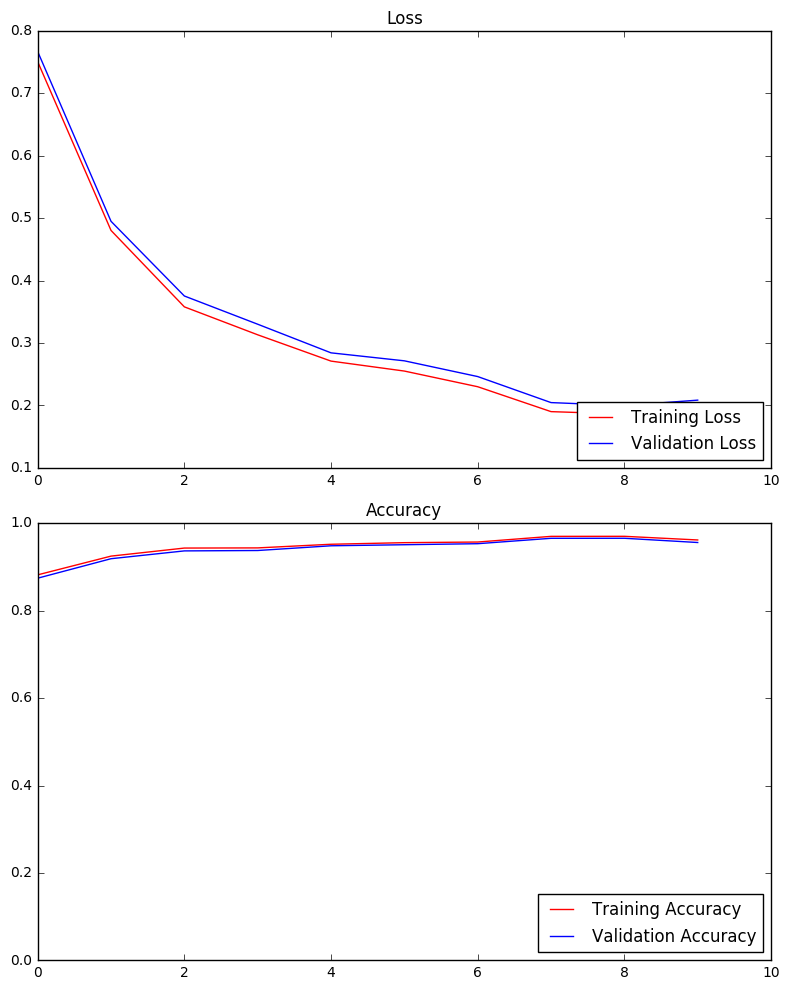

Unable to delete file.
Model saved


In [60]:
# Now after the best hyper-parameters have been found, train on the entire data-set
EPOCHS = 10
BATCH_SIZE = 128
reg = 10
lr = 0.03
train(X_train, y_train, X_val, y_val, X_test, y_test, lr)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The following variables were tried out for this model.

**Optimizers tried**: [AdamOptimizer, AdagradOptimizer]

**learning_rates**: [0.1, 0.03, 0.01, 0.005, 0.001, 0.0005, 0.0001]

**batch sizes** [50,64,100,128,200,250]
 
`Learning rate` of **0.03** and `batch size` of **128** worked out best for me. `AdagradOptimizer` worked well for my model architecture.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My usual approach is:

1. **Step 1**: Find an architecture and hyperparameters that can overfit a small subset of the training set in about 10 epochs.
2. **Step 2**: Then use dropout/regularization and the entire training data to reduce the overfitting.


# Simpler model
I started out with a very simple model, with just 2 layers. A conv layer followed by a fully connected layer and then by a softmax layer. After training my model for 40 epochs I got a train set accuracy of ~93%, validation set accuracy of ~91%. Not good enough, so I decided to increase my model complexity.

# Increase model complexity
The new model had 5 layers and described above.

### Without dropout
Trained the new model for 40 epochs and got a training set accuracy of ~95%, validation set accuracy of ~93% and test set accuracy of ~77%. I decided to add dropout to reduce the overfitting.

### With dropout
I added 1 dropout layer, after each conv layer (but before pooling). Trained the new model for 40 epochs. Similar results as without dropout. Training set accuracy of ~96%, validation 92% and test 80%.

### With regularization & Data Augmentation
I added a regularization penalty to the loss for the fully connected and softmax layers. Next I decided to augment the data to reduce overfitting even further. First by rotation and then by translation. This increased the size of the training set to 136016 (122414 training + 13602 validation) from 39209 (3.5x the original data).

After training the model for 10 epochs I got a training set accuracy of ~96%, validation set accuracy of ~95.6% and test set accuracy of 87.5%.

### With grayscale images
The perfomance did not improve with grayscale images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

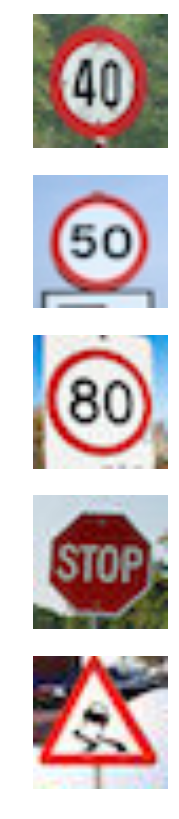

In [65]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

plt.rcParams['figure.figsize'] = (8, 10)

directory = 'traffic_test/'

image_names = ['test0.jpg','test5.jpg','test6.jpg', 'test7.jpg', 'test8.jpg']

test_images = np.zeros((9,32,32,3), dtype=np.uint8)

for i in range(5):
    image = mpimg.imread(directory + image_names[i])
    test_images[i] = image
    plt.subplot(5, 1, i+1)
    plt.imshow(image)
    plt.axis('off')
    
test_images = test_images.astype(np.float32)
test_images = normalize(test_images)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



##### **Answer:**

1. The first image is a speed limit, which is **NOT** in our training set (No 40 km/hr speed limit in our training set). So our model should be able to recognise it as a some kind of speed limit but not the right one.
2. This one is easy. Our model should be correctly able to classify this as 50 km/hr
3. This one is easy. Our model should be correctly able to classify this as 80 km/hr
4. The STOP should get easily classified.
5. It looks like a 'Slippery Road' image from the traffic signs dataset. Should be correctly classified

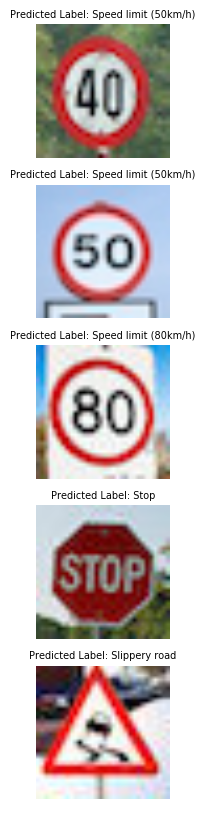

In [66]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

predicted_logits = sess.run(logits, feed_dict={x:test_images, keep_prob:1})
predicted_labels = np.argmax(predicted_logits, axis=1)

for i in range(5):
    image = mpimg.imread(directory + image_names[i])
    plt.subplot(5, 1, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Predicted Label: " + labels[predicted_labels[i]], fontsize=7)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

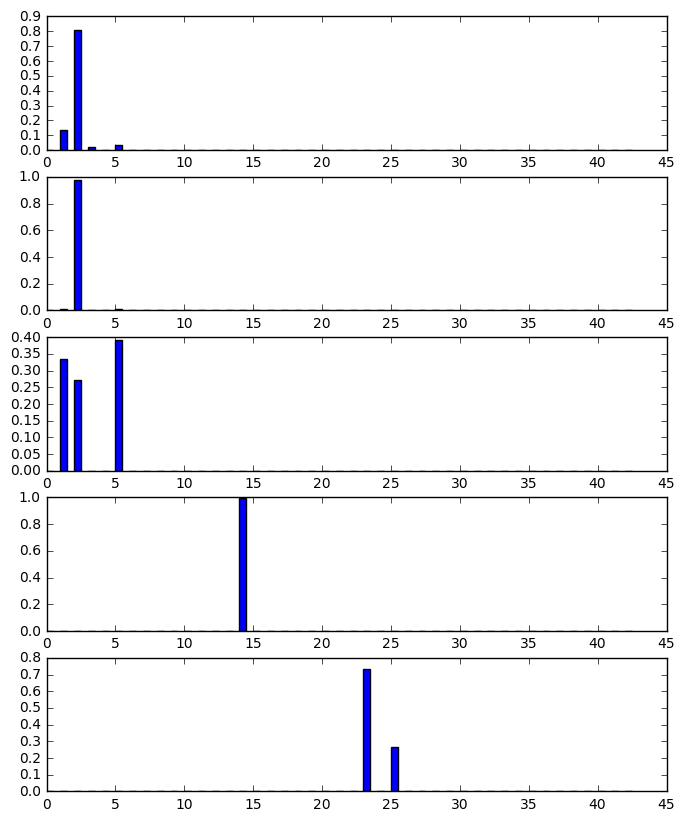

In [67]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

softmax_probabilites = softmax(predicted_logits)

fig = plt.figure()
width = 0.5
x_vals = range(43)
for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    ax.bar(x_vals, softmax_probabilites[i], width)

plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

From the softmax probability graphs it is clear that the model is pretty certain of its predictions except in image no. 3. In that image the model seems to be split between 30 km/hr, 50 km/hr and 80 km/hr, although the correct class probability is the highest. For the last image the model assigns non-trivial probability to the label 'Road Work', although at > 70% we can say that the model is certain of the correct label "Slippery Road".

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.